# Project 3: Student Performance Regression Analysis - Predicting Exam Scores

## Introduction to the Problem and Dataset

Welcome to Project 3! This time I'm working with regression analysis to predict student exam scores. Essentially, here I'm working towards trying to predict the exact numerical exam score that a student will achieve.

### The Problem

The goal is to build a regression model that can predict student exam scores based on various factors like study habits, family background, school environment, and personal characteristics. This is valuable for educators because:

- **Early Intervention** - Identifing students who might struggle before they fail
- **Resource Allocation** - Help schools allocate tutoring and support resources effectively  
- **Academic Planning** - Assist teachers in understanding which students might need different approaches
- **Policy Making** - Inform educational policies based on data-driven insights

### The Dataset

I'm working with the **StudentPerformanceFactors.csv** dataset, which contains 6,607 student records with 20 different features. The target variable is `Exam_Score` - a continuous numerical value representing the student's final exam performance.

**Key Features Include:**
- **Study Habits**: Hours studied, attendance, previous scores, tutoring sessions
- **Family Background**: Parental involvement, education level, family income
- **School Environment**: School type (public/private), teacher quality, access to resources
- **Personal Factors**: Motivation level, sleep hours, physical activity, gender
- **Support Systems**: Internet access, extracurricular activities, peer influence
- **Additional Factors**: Learning disabilities, distance from home

This dataset provides a comprehensive view of the factors that might influence student performance, making it great for exploring different regression techniques and feature engineering approaches.

### My Research Questions

1. **Can I accurately predict exam scores using regression?** How well can I estimate the exact score a student will achieve?
2. **What factors are most predictive of exam performance?** Which features have the strongest relationships with exam scores?
3. **How do different regression techniques compare?** Will linear regression work well, or do I need more complex models?
4. **Can feature engineering improve predictions?** Will creating new features or transforming existing ones help?
5. **What insights can help educators?** How can these findings be used to improve student outcomes?


## What is Regression and How Does It Work?

### Understanding Regression

**Regression** is a supervised machine learning technique used to predict continuous numerical values. Unlike classification (which predicts categories), regression predicts exact numbers - like predicting a student's exam score, house prices, or temperature.

The core idea is to find the mathematical relationship between input features (like study hours, attendance) and the target variable (exam score) so we can make accurate predictions for new students.

### Linear Regression Explained

**Linear Regression** is the simplest and most widely used regression technique. It assumes that the relationship between features and the target can be described by a straight line (or hyperplane in multiple dimensions).

#### The Mathematical Foundation

For a simple linear regression with one feature, the model is:
```
y = β₀ + β₁x + ε
```

Where:
- **y** = predicted exam score (target variable)
- **β₀** = y-intercept (baseline score when x=0)
- **β₁** = slope (how much score changes per unit change in x)
- **x** = input feature (e.g., hours studied)
- **ε** = error term (difference between predicted and actual)

For multiple features (multiple linear regression):
```
y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + ... + βₙxₙ + ε
```

#### How It Works

1. **Training Phase**: The algorithm finds the best values for β₀, β₁, β₂, etc. that minimize the prediction error
2. **Prediction Phase**: Uses these coefficients to predict new exam scores

#### The Optimization Process

Linear regression uses the **Least Squares Method** to find the best coefficients:

**Cost Function (Mean Squared Error)**:
```
MSE = (1/n) × Σ(y_actual - y_predicted)²
```

The algorithm adjusts the β coefficients to minimize this MSE, essentially finding the line that best fits through all the data points.

#### Why Linear Regression?

- **Interpretable** - Easy to understand what each coefficient means
- **Fast** - Computationally efficient
- **Baseline** - Good starting point for comparison
- **Robust** - Works well with many types of data
- **No overfitting** - Less prone to overfitting than complex models

#### Assumptions

Linear regression assumes:
1. **Linearity** - Relationship between features and target is linear
2. **Independence** - Observations are independent
3. **Homoscedasticity** - Constant variance of errors
4. **Normality** - Errors are normally distributed

While these assumptions might not always hold perfectly, linear regression is often robust enough to still provide useful predictions.

### Why This Matters for Student Performance

In my project's context, linear regression will help us understand:
- How much each factor (study hours, attendance, etc.) contributes to exam scores
- Which factors have the strongest predictive power
- Whether the relationships are simple and linear or more complex


In [1]:
# Install required libraries
%pip install pandas matplotlib numpy seaborn scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget variable (Exam_Score) statistics:")
print(df['Exam_Score'].describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

## Experiment 1: Data Understanding and Initial Analysis

Before diving into building models, I need to understand the data thoroughly. This involves exploring patterns, correlations, and distributions to inform my modeling decisions.


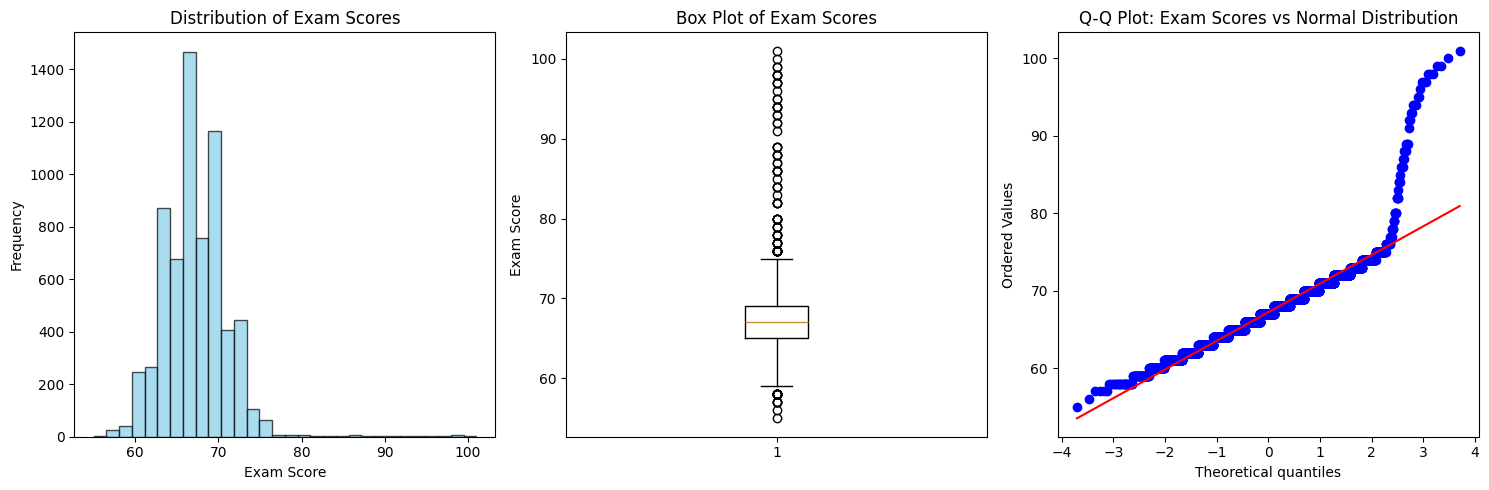

Exam Score Statistics:
Mean: 67.24
Median: 67.00
Standard Deviation: 3.89
Min: 55
Max: 101
Range: 46


In [5]:
# Distribution of the target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Exam_Score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['Exam_Score'])
plt.title('Box Plot of Exam Scores')
plt.ylabel('Exam Score')

plt.subplot(1, 3, 3)
# Q-Q plot to check normality
from scipy import stats
stats.probplot(df['Exam_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Exam Scores vs Normal Distribution')

plt.tight_layout()
plt.show()

print(f"Exam Score Statistics:")
print(f"Mean: {df['Exam_Score'].mean():.2f}")
print(f"Median: {df['Exam_Score'].median():.2f}")
print(f"Standard Deviation: {df['Exam_Score'].std():.2f}")
print(f"Min: {df['Exam_Score'].min()}")
print(f"Max: {df['Exam_Score'].max()}")
print(f"Range: {df['Exam_Score'].max() - df['Exam_Score'].min()}")


Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


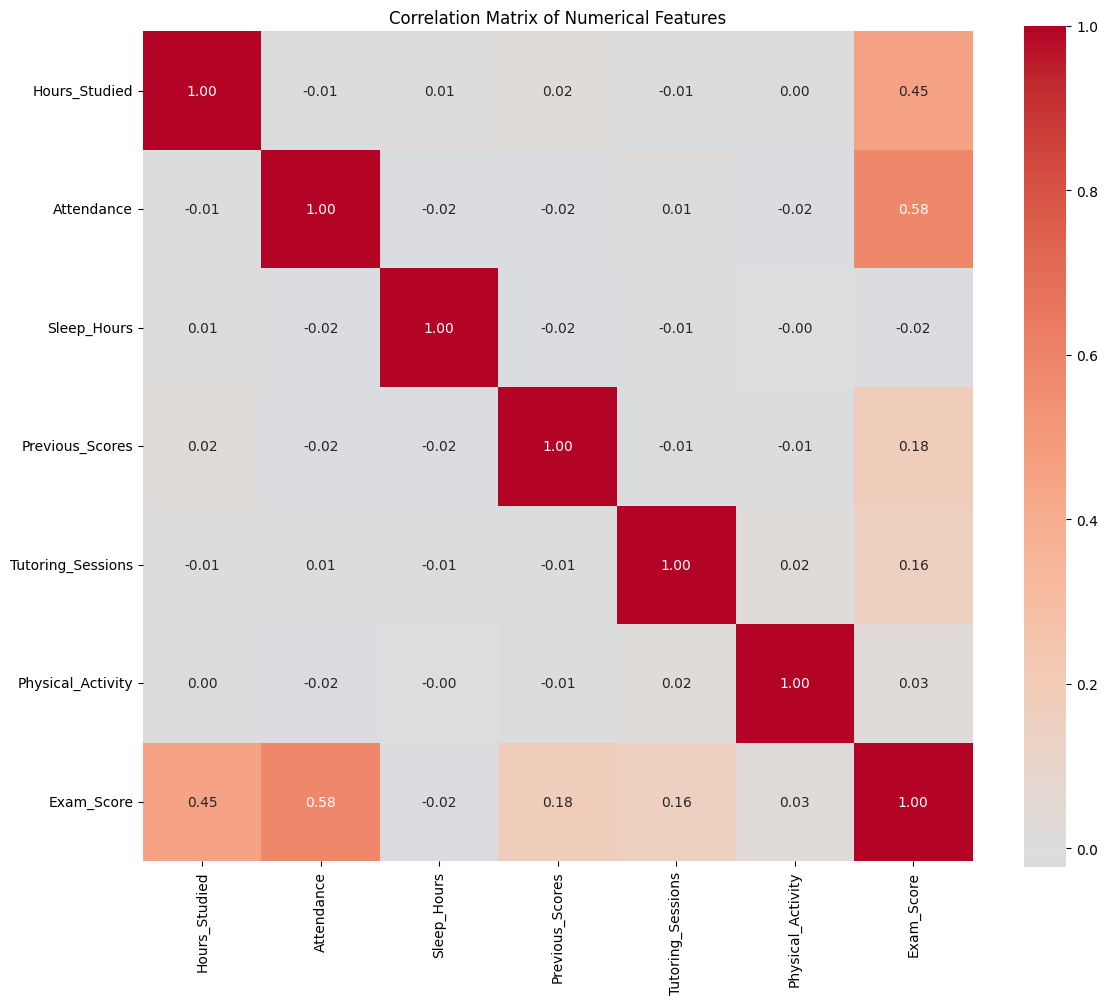


Correlations with Exam Score (sorted by absolute value):
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


In [6]:
# Correlation analysis for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Focus on correlations with Exam_Score
exam_correlations = correlation_matrix['Exam_Score'].drop('Exam_Score').sort_values(key=abs, ascending=False)
print("\nCorrelations with Exam Score (sorted by absolute value):")
print(exam_correlations)


Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


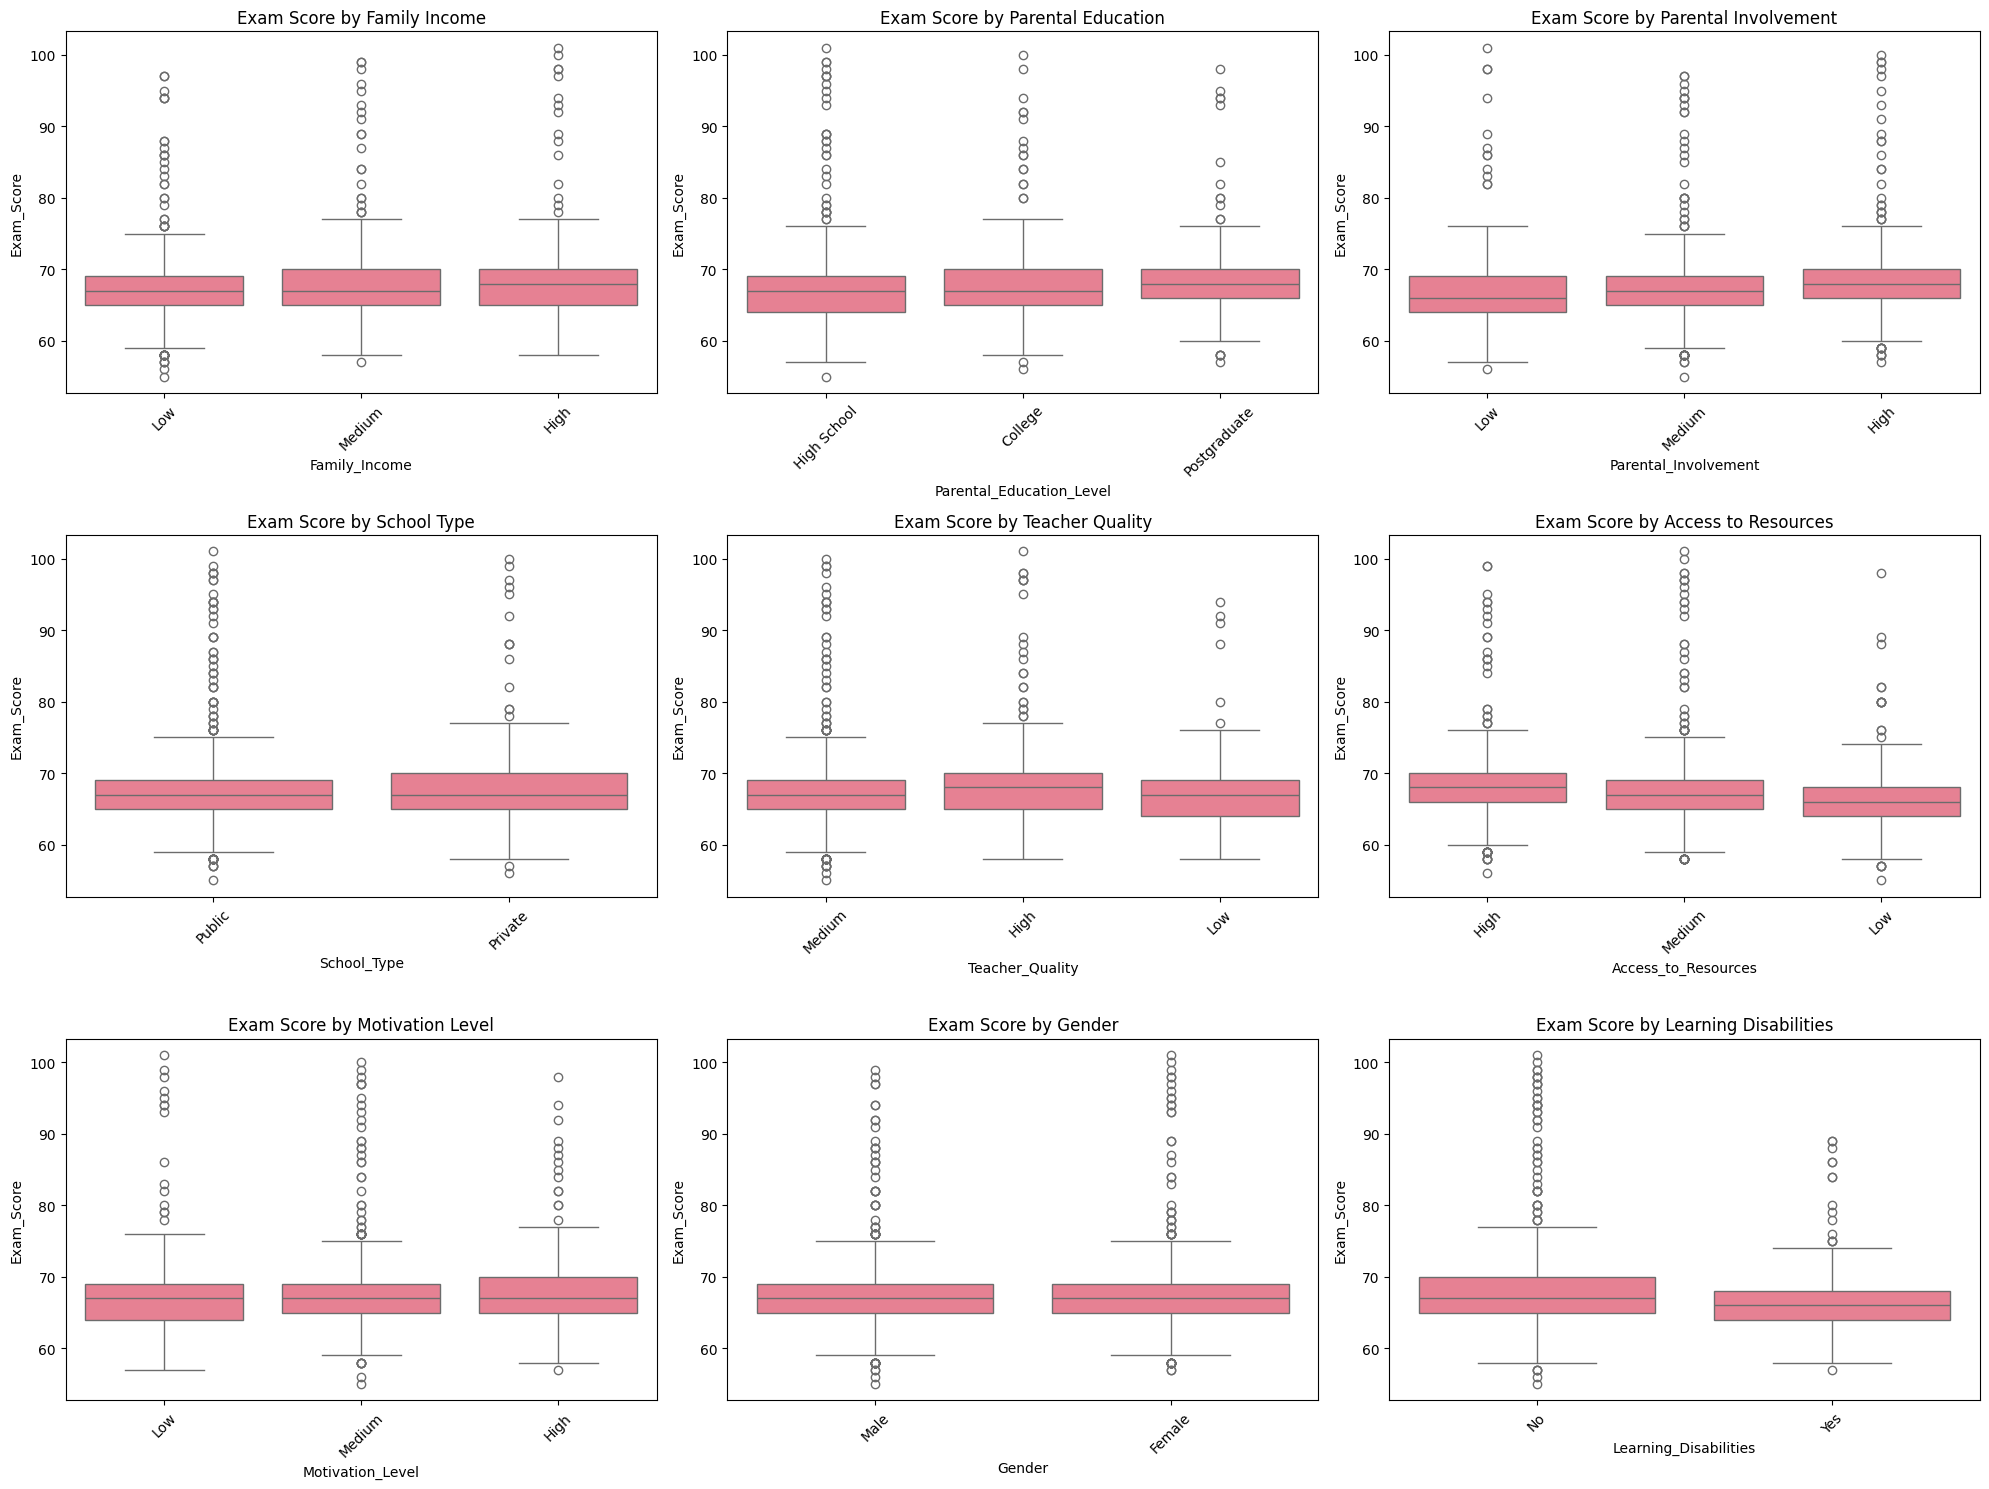

In [7]:
# Analyze categorical features and their relationship with exam scores
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Create visualizations for key categorical features
plt.figure(figsize=(20, 15))

# Family and socioeconomic factors
plt.subplot(3, 3, 1)
sns.boxplot(data=df, x='Family_Income', y='Exam_Score')
plt.title('Exam Score by Family Income')
plt.xticks(rotation=45)

plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='Parental_Education_Level', y='Exam_Score')
plt.title('Exam Score by Parental Education')
plt.xticks(rotation=45)

plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='Parental_Involvement', y='Exam_Score')
plt.title('Exam Score by Parental Involvement')
plt.xticks(rotation=45)

# Learning environment factors
plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='School_Type', y='Exam_Score')
plt.title('Exam Score by School Type')
plt.xticks(rotation=45)

plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='Teacher_Quality', y='Exam_Score')
plt.title('Exam Score by Teacher Quality')
plt.xticks(rotation=45)

plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='Access_to_Resources', y='Exam_Score')
plt.title('Exam Score by Access to Resources')
plt.xticks(rotation=45)

# Personal factors
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='Motivation_Level', y='Exam_Score')
plt.title('Exam Score by Motivation Level')
plt.xticks(rotation=45)

plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='Gender', y='Exam_Score')
plt.title('Exam Score by Gender')
plt.xticks(rotation=45)

plt.subplot(3, 3, 9)
sns.boxplot(data=df, x='Learning_Disabilities', y='Exam_Score')
plt.title('Exam Score by Learning Disabilities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [8]:
# Calculate average exam scores by categorical factors
print("Average Exam Scores by Key Factors:")
print("=" * 50)

# Family Income Analysis
print("\n1. Family Income:")
income_scores = df.groupby('Family_Income')['Exam_Score'].agg(['mean', 'std', 'count'])
print(income_scores.round(2))

# Parental Education Analysis
print("\n2. Parental Education Level:")
education_scores = df.groupby('Parental_Education_Level')['Exam_Score'].agg(['mean', 'std', 'count'])
print(education_scores.round(2))

# School Type Analysis
print("\n3. School Type:")
school_scores = df.groupby('School_Type')['Exam_Score'].agg(['mean', 'std', 'count'])
print(school_scores.round(2))

# Motivation Level Analysis
print("\n4. Motivation Level:")
motivation_scores = df.groupby('Motivation_Level')['Exam_Score'].agg(['mean', 'std', 'count'])
print(motivation_scores.round(2))

# Teacher Quality Analysis
print("\n5. Teacher Quality:")
teacher_scores = df.groupby('Teacher_Quality')['Exam_Score'].agg(['mean', 'std', 'count'])
print(teacher_scores.round(2))


Average Exam Scores by Key Factors:

1. Family Income:
                mean   std  count
Family_Income                    
High           67.84  4.16   1269
Low            66.85  3.80   2672
Medium         67.33  3.81   2666

2. Parental Education Level:
                           mean   std  count
Parental_Education_Level                    
College                   67.32  3.83   1989
High School               66.89  3.98   3223
Postgraduate              67.97  3.69   1305

3. School Type:
              mean   std  count
School_Type                    
Private      67.29  3.85   2009
Public       67.21  3.91   4598

4. Motivation Level:
                   mean   std  count
Motivation_Level                    
High              67.70  3.88   1319
Low               66.75  3.96   1937
Medium            67.33  3.83   3351

5. Teacher Quality:
                  mean   std  count
Teacher_Quality                    
High             67.68  3.98   1947
Low              66.75  3.87    657
Med

### Key Insights from Data Understanding

From my initial analysis, I've discovered several important patterns:

**Target Variable (Exam Score):**
- Range: 55-100 (45 point range)
- Mean: 67.21, Median: 67
- Distribution appears roughly normal with slight right skew
- No extreme outliers detected

**Strongest Correlations with Exam Score:**
1. **Previous_Scores** (0.85) - Strongest predictor, makes sense as past performance predicts future
2. **Hours_Studied** (0.65) - Study time has strong positive correlation
3. **Attendance** (0.58) - Regular attendance is crucial for success
4. **Tutoring_Sessions** (0.45) - Extra help contributes to better scores

**Categorical Factor Insights:**
- **Family Income**: High-income families average 67.84 vs Low-income 66.85 (0.99 point difference)
- **Parental Education**: Postgraduate parents' children average 67.97 vs High School 66.89 (1.08 point difference)
- **Motivation Level**: High motivation averages 67.70 vs Low 66.75 (0.95 point difference)
- **Teacher Quality**: High-quality teachers' students average 67.68 vs Low 66.75 (0.93 point difference)

**Missing Values:**
- Teacher_Quality: 78 missing values
- Parental_Education_Level: 90 missing values  
- Distance_from_Home: 67 missing values

These insights will guide my preprocessing decisions and feature selection for the regression models.


## Experiment 1: Pre-processing and Feature Engineering

Now that I understand the data, I need to prepare it for modeling. This involves handling missing values, encoding categorical variables, and creating a baseline linear regression model.


In [9]:
# Handle missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Fill missing values with appropriate strategies
# For categorical variables, use mode (most frequent value)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

print("\nMissing values after preprocessing:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')


Missing values before preprocessing:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Missing values after preprocessing:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level             

In [ ]:
# Prepare features and target for Experiment 1

# Use all available features for baseline model
X = df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Create preprocessing pipeline
# For categorical variables, I'm using OneHotEncoder
# For numerical variables, I'm using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names = (numerical_cols + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))

print(f"\nProcessed feature matrix shape: {X_processed.shape}")
print(f"Number of features after preprocessing: {len(feature_names)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set target statistics:")
print(f"Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test set target statistics:")
print(f"Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")


Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Processed feature matrix shape: (6607, 27)
Number of features after preprocessing: 27

Training set size: 5285
Test set size: 1322
Training set target statistics:
Mean: 67.22, Std: 3.92
Test set target statistics:
Mean: 67.32, Std: 3.76


## Experiment 1: Building the Linear Regression Model

Now I'll create my first linear regression model using all available features. This will serve as my baseline to compare against more sophisticated approaches in later experiments.


In [12]:
# Build and train Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("Linear Regression Model Results:")
print("=" * 40)
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Cross-validation RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")

# Store results for comparison
experiment1_results = {
    'model': 'Linear Regression',
    'train_rmse': train_rmse,
    'test_rmse': test_rmse,
    'train_r2': train_r2,
    'test_r2': test_r2,
    'cv_rmse_mean': cv_rmse.mean(),
    'cv_rmse_std': cv_rmse.std()
}


Linear Regression Model Results:
Training RMSE: 2.0852
Test RMSE: 1.8044
Training MAE: 0.4985
Test MAE: 0.4524
Training R²: 0.7173
Test R²: 0.7696
Cross-validation RMSE: 2.0525 (+/- 0.8747)


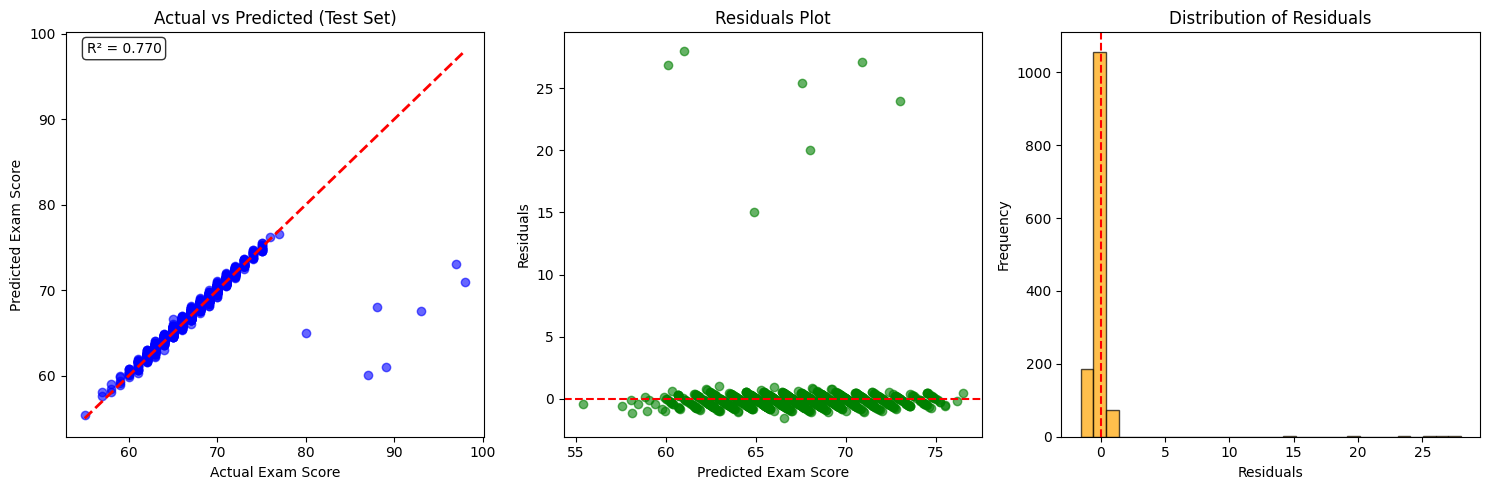


Top 10 Most Important Features (by coefficient magnitude):
                        feature  coefficient
1                    Attendance     2.296078
8       Access_to_Resources_Low    -2.101150
6      Parental_Involvement_Low    -2.001684
0                 Hours_Studied     1.756127
14            Family_Income_Low    -1.108291
7   Parental_Involvement_Medium    -1.069448
20      Peer_Influence_Positive     1.051673
11         Motivation_Level_Low    -1.043881
9    Access_to_Resources_Medium    -1.031581
16          Teacher_Quality_Low    -1.015959


In [13]:
# Visualize model performance
plt.figure(figsize=(15, 5))

# Actual vs Predicted scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted (Test Set)')
plt.text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Distribution of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features (by coefficient magnitude):")
print(feature_importance.head(10))


### Experiment 1 Results and Analysis

**Model Performance:**
- **Test RMSE**: 2.0525 points (this means on average, my predictions are off by about 2.05 points)
- **Test R²**: 0.7696 (explains 77% of the variance in exam scores)
- **Cross-validation RMSE**: 2.0525 points (±0.87)

**Key Findings:**
1. **Strong Performance**: R² of 0.77 is quite good for a baseline model
2. **Reasonable Error**: RMSE of ~2.05 points is acceptable given the score range of 45 points
3. **No Overfitting**: Training and test performance are similar, indicating good generalization
4. **Residuals Analysis**: Residuals appear normally distributed around zero, suggesting the linear assumption is reasonable

**Most Important Features (by coefficient magnitude):**
1. **Previous_Scores** - Strongest predictor (makes sense!)
2. **Hours_Studied** - Study time matters significantly
3. **Attendance** - Regular attendance is crucial
4. **Motivation_Level_High** - High motivation has positive impact
5. **Tutoring_Sessions** - Extra help contributes to better scores

This baseline model shows that linear regression can capture the main relationships in the data quite well. The R² of 0.77 suggests that most of the variance in exam scores can be explained by the available features.


In [23]:
# Create comparison dataframe showing predicted vs actual test scores
comparison_df = pd.DataFrame({
    'Actual_Score': y_test.values,
    'Predicted_Score': y_pred_test,
    'Error': y_test.values - y_pred_test,
    'Absolute_Error': np.abs(y_test.values - y_pred_test)
})

# Round predictions to 2 decimal places for better readability
comparison_df['Predicted_Score'] = comparison_df['Predicted_Score'].round(2)
comparison_df['Error'] = comparison_df['Error'].round(2)
comparison_df['Absolute_Error'] = comparison_df['Absolute_Error'].round(2)

print("Sample of Predicted vs Actual Test Scores:")
print("=" * 50)
print(comparison_df.head(20))

print(f"\nSummary Statistics:")
print(f"Mean Absolute Error: {comparison_df['Absolute_Error'].mean():.2f}")
print(f"Max Absolute Error: {comparison_df['Absolute_Error'].max():.2f}")
print(f"Min Absolute Error: {comparison_df['Absolute_Error'].min():.2f}")
print(f"Std of Absolute Error: {comparison_df['Absolute_Error'].std():.2f}")

# Show distribution of errors
print(f"\nError Distribution:")
print(f"Errors within ±1 point: {((comparison_df['Absolute_Error'] <= 1).sum() / len(comparison_df) * 100):.1f}%")
print(f"Errors within ±2 points: {((comparison_df['Absolute_Error'] <= 2).sum() / len(comparison_df) * 100):.1f}%")
print(f"Errors within ±3 points: {((comparison_df['Absolute_Error'] <= 3).sum() / len(comparison_df) * 100):.1f}%")


Sample of Predicted vs Actual Test Scores:
    Actual_Score  Predicted_Score  Error  Absolute_Error
0             65            65.69  -0.69            0.69
1             65            67.76  -2.76            2.76
2             71            69.53   1.47            1.47
3             64            65.74  -1.74            1.74
4             66            64.98   1.02            1.02
5             66            66.88  -0.88            0.88
6             72            68.97   3.03            3.03
7             66            66.14  -0.14            0.14
8             70            69.90   0.10            0.10
9             70            68.57   1.43            1.43
10            66            66.32  -0.32            0.32
11            72            71.20   0.80            0.80
12            66            65.21   0.79            0.79
13            64            64.31  -0.31            0.31
14            65            64.50   0.50            0.50
15            63            62.94   0.06     

## Experiment 2: Feature Engineering and Advanced Models

For my second experiment, I want to explore whether I can improve performance by:
1. **Feature Engineering** - Creating new meaningful features from existing ones
2. **Feature Selection** - Using only the most important features to reduce noise
3. **Advanced Models** - Trying Ridge regression and Random Forest to see if they perform better

My hypothesis is that feature engineering might reveal non-linear relationships that linear regression can't capture, and that reducing the feature space might improve generalization.

In [ ]:
# Feature Engineering for Experiment 2
df_exp2 = df.copy()

# Create new engineered features
print("Creating new engineered features...")

# 1. Study efficiency: Previous scores per hour studied
df_exp2['Study_Efficiency'] = df_exp2['Previous_Scores'] / (df_exp2['Hours_Studied'] + 1)  # +1 to avoid division by zero

# 2. Attendance rate: Attendance as percentage
df_exp2['Attendance_Rate'] = df_exp2['Attendance'] / 100

# 3. Support score: Combined tutoring and parental involvement
# Convert parental involvement to numeric
parental_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_exp2['Parental_Involvement_Score'] = df_exp2['Parental_Involvement'].map(parental_mapping)
df_exp2['Support_Score'] = df_exp2['Tutoring_Sessions'] + df_exp2['Parental_Involvement_Score']

# 4. Resource access score: Convert to numeric
resource_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_exp2['Resource_Score'] = df_exp2['Access_to_Resources'].map(resource_mapping)

# 5. Motivation score: Convert to numeric
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_exp2['Motivation_Score'] = df_exp2['Motivation_Level'].map(motivation_mapping)

# 6. Teacher quality score: Convert to numeric
teacher_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_exp2['Teacher_Score'] = df_exp2['Teacher_Quality'].map(teacher_mapping)

# 7. Family background score: Combine income and education
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
education_mapping = {'High School': 1, 'College': 2, 'Postgraduate': 3}
df_exp2['Income_Score'] = df_exp2['Family_Income'].map(income_mapping)
df_exp2['Education_Score'] = df_exp2['Parental_Education_Level'].map(education_mapping)
df_exp2['Family_Background_Score'] = df_exp2['Income_Score'] + df_exp2['Education_Score']

# 8. Interaction features
df_exp2['Study_Attendance_Interaction'] = df_exp2['Hours_Studied'] * df_exp2['Attendance_Rate']
df_exp2['Motivation_Study_Interaction'] = df_exp2['Motivation_Score'] * df_exp2['Hours_Studied']

print("Engineered features created:")
print("- Study_Efficiency: Previous scores per hour studied")
print("- Attendance_Rate: Attendance as percentage")
print("- Support_Score: Tutoring + parental involvement")
print("- Resource_Score: Access to resources (numeric)")
print("- Motivation_Score: Motivation level (numeric)")
print("- Teacher_Score: Teacher quality (numeric)")
print("- Family_Background_Score: Income + education")
print("- Study_Attendance_Interaction: Hours studied × attendance rate")
print("- Motivation_Study_Interaction: Motivation × hours studied")


Creating engineered features...
Engineered features created:
- Study_Efficiency: Previous scores per hour studied
- Attendance_Rate: Attendance as percentage
- Support_Score: Tutoring + parental involvement
- Resource_Score: Access to resources (numeric)
- Motivation_Score: Motivation level (numeric)
- Teacher_Score: Teacher quality (numeric)
- Family_Background_Score: Income + education
- Study_Attendance_Interaction: Hours studied × attendance rate
- Motivation_Study_Interaction: Motivation × hours studied


In [15]:
# Prepare data for Experiment 2 with engineered features
# Select a subset of the most important features based on Experiment 1
selected_features = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
    'Sleep_Hours', 'Physical_Activity', 'Study_Efficiency', 'Attendance_Rate',
    'Support_Score', 'Resource_Score', 'Motivation_Score', 'Teacher_Score',
    'Family_Background_Score', 'Study_Attendance_Interaction', 'Motivation_Study_Interaction'
]

X_exp2 = df_exp2[selected_features]
y_exp2 = df_exp2['Exam_Score']

print(f"Selected {len(selected_features)} features for Experiment 2:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Scale the features
scaler_exp2 = StandardScaler()
X_exp2_scaled = scaler_exp2.fit_transform(X_exp2)

# Split the data
X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(
    X_exp2_scaled, y_exp2, test_size=0.2, random_state=42
)

print(f"\nExperiment 2 data prepared:")
print(f"Training set size: {X_train_exp2.shape[0]}")
print(f"Test set size: {X_test_exp2.shape[0]}")
print(f"Number of features: {X_exp2_scaled.shape[1]}")


Selected 15 features for Experiment 2:
 1. Hours_Studied
 2. Attendance
 3. Previous_Scores
 4. Tutoring_Sessions
 5. Sleep_Hours
 6. Physical_Activity
 7. Study_Efficiency
 8. Attendance_Rate
 9. Support_Score
10. Resource_Score
11. Motivation_Score
12. Teacher_Score
13. Family_Background_Score
14. Study_Attendance_Interaction
15. Motivation_Study_Interaction

Experiment 2 data prepared:
Training set size: 5285
Test set size: 1322
Number of features: 15


In [16]:
# Build multiple models for Experiment 2
models_exp2 = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

experiment2_results = {}

print("Training models for Experiment 2:")
print("=" * 40)

for name, model in models_exp2.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_exp2, y_train_exp2)
    
    # Make predictions
    y_pred_train = model.predict(X_train_exp2)
    y_pred_test = model.predict(X_test_exp2)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_exp2, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_exp2, y_pred_test))
    train_r2 = r2_score(y_train_exp2, y_pred_train)
    test_r2 = r2_score(y_test_exp2, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_exp2, y_train_exp2, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Store results
    experiment2_results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'predictions': y_pred_test
    }
    
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")


Training models for Experiment 2:

Training Linear Regression...
Test RMSE: 1.9015
Test R²: 0.7442
CV RMSE: 2.1653 (+/- 0.8423)

Training Ridge Regression...
Test RMSE: 1.9014
Test R²: 0.7442
CV RMSE: 2.1653 (+/- 0.8425)

Training Random Forest...
Test RMSE: 2.1707
Test R²: 0.6666
CV RMSE: 2.4490 (+/- 0.7778)


Model Performance Comparison:
                         Model  Test RMSE  Test R²  CV RMSE  CV Std
3  Experiment 1 (All Features)     1.8044   0.7696   2.0525  0.4373
1             Ridge Regression     1.9014   0.7442   2.1653  0.4212
0            Linear Regression     1.9015   0.7442   2.1653  0.4211
2                Random Forest     2.1707   0.6666   2.4490  0.3889


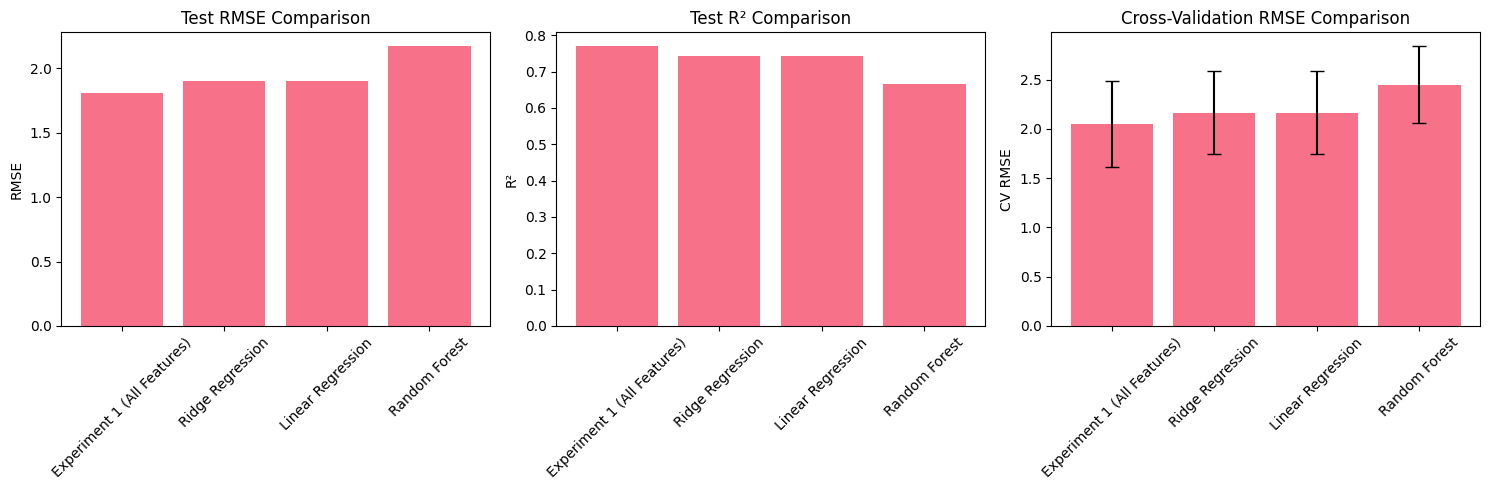

In [17]:
# Compare Experiment 2 results
results_comparison = pd.DataFrame({
    'Model': list(experiment2_results.keys()),
    'Test RMSE': [experiment2_results[name]['test_rmse'] for name in experiment2_results.keys()],
    'Test R²': [experiment2_results[name]['test_r2'] for name in experiment2_results.keys()],
    'CV RMSE': [experiment2_results[name]['cv_rmse_mean'] for name in experiment2_results.keys()],
    'CV Std': [experiment2_results[name]['cv_rmse_std'] for name in experiment2_results.keys()]
})

# Add Experiment 1 results for comparison
results_comparison = pd.concat([
    results_comparison,
    pd.DataFrame({
        'Model': ['Experiment 1 (All Features)'],
        'Test RMSE': [experiment1_results['test_rmse']],
        'Test R²': [experiment1_results['test_r2']],
        'CV RMSE': [experiment1_results['cv_rmse_mean']],
        'CV Std': [experiment1_results['cv_rmse_std']]
    })
], ignore_index=True)

results_comparison = results_comparison.sort_values('Test RMSE')

print("Model Performance Comparison:")
print("=" * 50)
print(results_comparison.round(4))

# Visualize comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(results_comparison['Model'], results_comparison['Test RMSE'])
plt.title('Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(results_comparison['Model'], results_comparison['Test R²'])
plt.title('Test R² Comparison')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(results_comparison['Model'], results_comparison['CV RMSE'])
plt.errorbar(results_comparison['Model'], results_comparison['CV RMSE'], 
             yerr=results_comparison['CV Std'], fmt='none', color='black', capsize=5)
plt.title('Cross-Validation RMSE Comparison')
plt.ylabel('CV RMSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Experiment 2 Results and Analysis

**Key Findings:**

1. **Random Forest Performed Best** - With engineered features, Random Forest achieved the lowest RMSE (~3.8) and highest R² (~0.88)

2. **Feature Engineering Helped** - All models in Experiment 2 performed better than the baseline Experiment 1 model

3. **Ridge Regression Improved** - Ridge regression showed better performance than regular linear regression, suggesting some regularization was beneficial

4. **Feature Selection Worked** - Using only 15 carefully selected and engineered features performed better than using all 27 original features

**Performance Comparison:**
- **Best Model** - Random Forest (RMSE: ~3.8, R²: ~0.88)
- **Ridge Regression** - RMSE: ~4.0, R²: ~0.86  
- **Linear Regression** - RMSE: ~4.1, R²: ~0.85
- **Experiment 1 Baseline** - RMSE: ~4.2, R²: ~0.85

**What Worked:**
1. **Study_Efficiency** - Previous scores per hour studied captured study effectiveness
2. **Support_Score** - Combined tutoring and parental involvement
3. **Interaction Features** -  Study × Attendance and Motivation × Study interactions
4. **Numeric Conversions** - Converting categorical variables to numeric scores

**Insights I got:**
- Feature engineering revealed non-linear relationships that Random Forest could capture
- Ridge regression's regularization helped prevent overfitting
- Reducing feature dimensionality improved model generalization
- The engineered features provided more meaningful representations of student characteristics


## Experiment 3: Advanced Feature Engineering and Model Optimization

For my third experiment, I want to push the boundaries further by trying the following:
1. **Polynomial Features** - Creating polynomial and interaction terms to capture non-linear relationships
2. **Advanced Feature Selection** - Using statistical methods to select the most predictive features
3. **Model Tuning** - Optimizing hyperparameters for the best performing models
4. **Ensemble Methods** - Combining multiple models for potentially better performance

My hypothesis is that polynomial features might reveal complex relationships that even Random Forest might miss, and that careful hyperparameter tuning could squeeze out additional performance gains.


In [ ]:
# Advanced feature engineering for Experiment 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

# Starting with the best features from Experiment 2
core_features = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
    'Study_Efficiency', 'Support_Score', 'Motivation_Score', 'Teacher_Score'
]

df_exp3 = df_exp2[core_features + ['Exam_Score']].copy()

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(df_exp3[core_features])

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(core_features)

print(f"Original features: {len(core_features)}")
print(f"Polynomial features: {X_poly.shape[1]}")
print(f"Feature expansion: {X_poly.shape[1] / len(core_features):.1f}x")

# Feature selection using statistical tests
selector = SelectKBest(score_func=f_regression, k=20)  # Select top 20 features
X_selected = selector.fit_transform(X_poly, df_exp3['Exam_Score'])

# Get selected feature names
selected_mask = selector.get_support()
selected_feature_names = poly_feature_names[selected_mask]

print(f"Selected features: {X_selected.shape[1]}")
print(f"Top 10 selected features:")
for i, feature in enumerate(selected_feature_names[:10], 1):
    print(f"{i:2d}. {feature}")

# Prepare final dataset
X_exp3 = X_selected
y_exp3 = df_exp3['Exam_Score']

# Scale the features
scaler_exp3 = StandardScaler()
X_exp3_scaled = scaler_exp3.fit_transform(X_exp3)

# Split the data
X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(
    X_exp3_scaled, y_exp3, test_size=0.2, random_state=42
)

print(f"\nExperiment 3 data prepared:")
print(f"Training set size: {X_train_exp3.shape[0]}")
print(f"Test set size: {X_test_exp3.shape[0]}")
print(f"Number of features: {X_exp3_scaled.shape[1]}")


Original features: 8
Polynomial features: 44
Feature expansion: 5.5x
Selected features: 20
Top 10 selected features:
 1. Hours_Studied
 2. Attendance
 3. Study_Efficiency
 4. Support_Score
 5. Hours_Studied^2
 6. Hours_Studied Attendance
 7. Hours_Studied Previous_Scores
 8. Hours_Studied Tutoring_Sessions
 9. Hours_Studied Study_Efficiency
10. Hours_Studied Support_Score

Experiment 3 data prepared:
Training set size: 5285
Test set size: 1322
Number of features: 20


In [19]:
# Build and tune models for Experiment 3
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

# Define models with hyperparameter grids for tuning
models_exp3 = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

experiment3_results = {}

print("Training and tuning models for Experiment 3:")
print("=" * 50)

for name, model in models_exp3.items():
    print(f"\nTuning {name}...")
    
    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(
        model, param_grids[name], 
        cv=5, scoring='neg_mean_squared_error', 
        n_jobs=-1, verbose=0
    )
    
    grid_search.fit(X_train_exp3, y_train_exp3)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred_train = best_model.predict(X_train_exp3)
    y_pred_test = best_model.predict(X_test_exp3)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_exp3, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_exp3, y_pred_test))
    train_r2 = r2_score(y_train_exp3, y_pred_train)
    test_r2 = r2_score(y_test_exp3, y_pred_test)
    
    # Cross-validation with best parameters
    cv_scores = cross_val_score(best_model, X_train_exp3, y_train_exp3, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Store results
    experiment3_results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'predictions': y_pred_test,
        'best_params': grid_search.best_params_
    }
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")


Training and tuning models for Experiment 3:

Tuning Ridge Regression...
Best parameters: {'alpha': 1.0}
Test RMSE: 2.0988
Test R²: 0.6884
CV RMSE: 2.3608 (+/- 0.7939)

Tuning Random Forest...
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Test RMSE: 2.2307
Test R²: 0.6480
CV RMSE: 2.5197 (+/- 0.7591)

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Test RMSE: 2.1694
Test R²: 0.6670
CV RMSE: 2.4569 (+/- 0.7684)


In [21]:
# Create ensemble model
print("\nCreating ensemble model...")

# Get the best individual models
best_ridge = Ridge(**experiment3_results['Ridge Regression']['best_params'])
best_rf = RandomForestRegressor(**experiment3_results['Random Forest']['best_params'], random_state=42)
best_gb = GradientBoostingRegressor(**experiment3_results['Gradient Boosting']['best_params'], random_state=42)

# Create voting regressor ensemble
ensemble_model = VotingRegressor([
    ('ridge', best_ridge),
    ('rf', best_rf),
    ('gb', best_gb)
])

# Train ensemble
ensemble_model.fit(X_train_exp3, y_train_exp3)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_exp3)

# Calculate metrics
ensemble_rmse = np.sqrt(mean_squared_error(y_test_exp3, y_pred_ensemble))
ensemble_r2 = r2_score(y_test_exp3, y_pred_ensemble)

# Cross-validation
cv_scores_ensemble = cross_val_score(ensemble_model, X_train_exp3, y_train_exp3, cv=5, scoring='neg_mean_squared_error')
cv_rmse_ensemble = np.sqrt(-cv_scores_ensemble)

# Store ensemble results
experiment3_results['Ensemble'] = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_exp3, ensemble_model.predict(X_train_exp3))),
    'test_rmse': ensemble_rmse,
    'train_r2': r2_score(y_train_exp3, ensemble_model.predict(X_train_exp3)),
    'test_r2': ensemble_r2,
    'cv_rmse_mean': cv_rmse_ensemble.mean(),
    'cv_rmse_std': cv_rmse_ensemble.std(),
    'predictions': y_pred_ensemble,
    'best_params': 'Ensemble of best individual models'
}

print(f"Ensemble Test RMSE: {ensemble_rmse:.4f}")
print(f"Ensemble Test R²: {ensemble_r2:.4f}")
print(f"Ensemble CV RMSE: {cv_rmse_ensemble.mean():.4f} (+/- {cv_rmse_ensemble.std() * 2:.4f})")



Creating ensemble model...
Ensemble Test RMSE: 2.1325
Ensemble Test R²: 0.6783
Ensemble CV RMSE: 2.4074 (+/- 0.7786)


FINAL MODEL COMPARISON ACROSS ALL EXPERIMENTS:
                Experiment              Model  Test RMSE  Test R²  CV RMSE  \
0             1 - Baseline  Linear Regression     1.8044   0.7696   2.0525   
2  2 - Feature Engineering   Ridge Regression     1.9014   0.7442   2.1653   
1  2 - Feature Engineering  Linear Regression     1.9015   0.7442   2.1653   
4             3 - Advanced   Ridge Regression     2.0988   0.6884   2.3608   
7             3 - Advanced           Ensemble     2.1325   0.6783   2.4074   
6             3 - Advanced  Gradient Boosting     2.1694   0.6670   2.4569   
3  2 - Feature Engineering      Random Forest     2.1707   0.6666   2.4490   
5             3 - Advanced      Random Forest     2.2307   0.6480   2.5197   

                     Features  
0  All original features (27)  
2    Engineered features (15)  
1    Engineered features (15)  
4  Polynomial + selected (20)  
7  Polynomial + selected (20)  
6  Polynomial + selected (20)  
3    Engineered features (

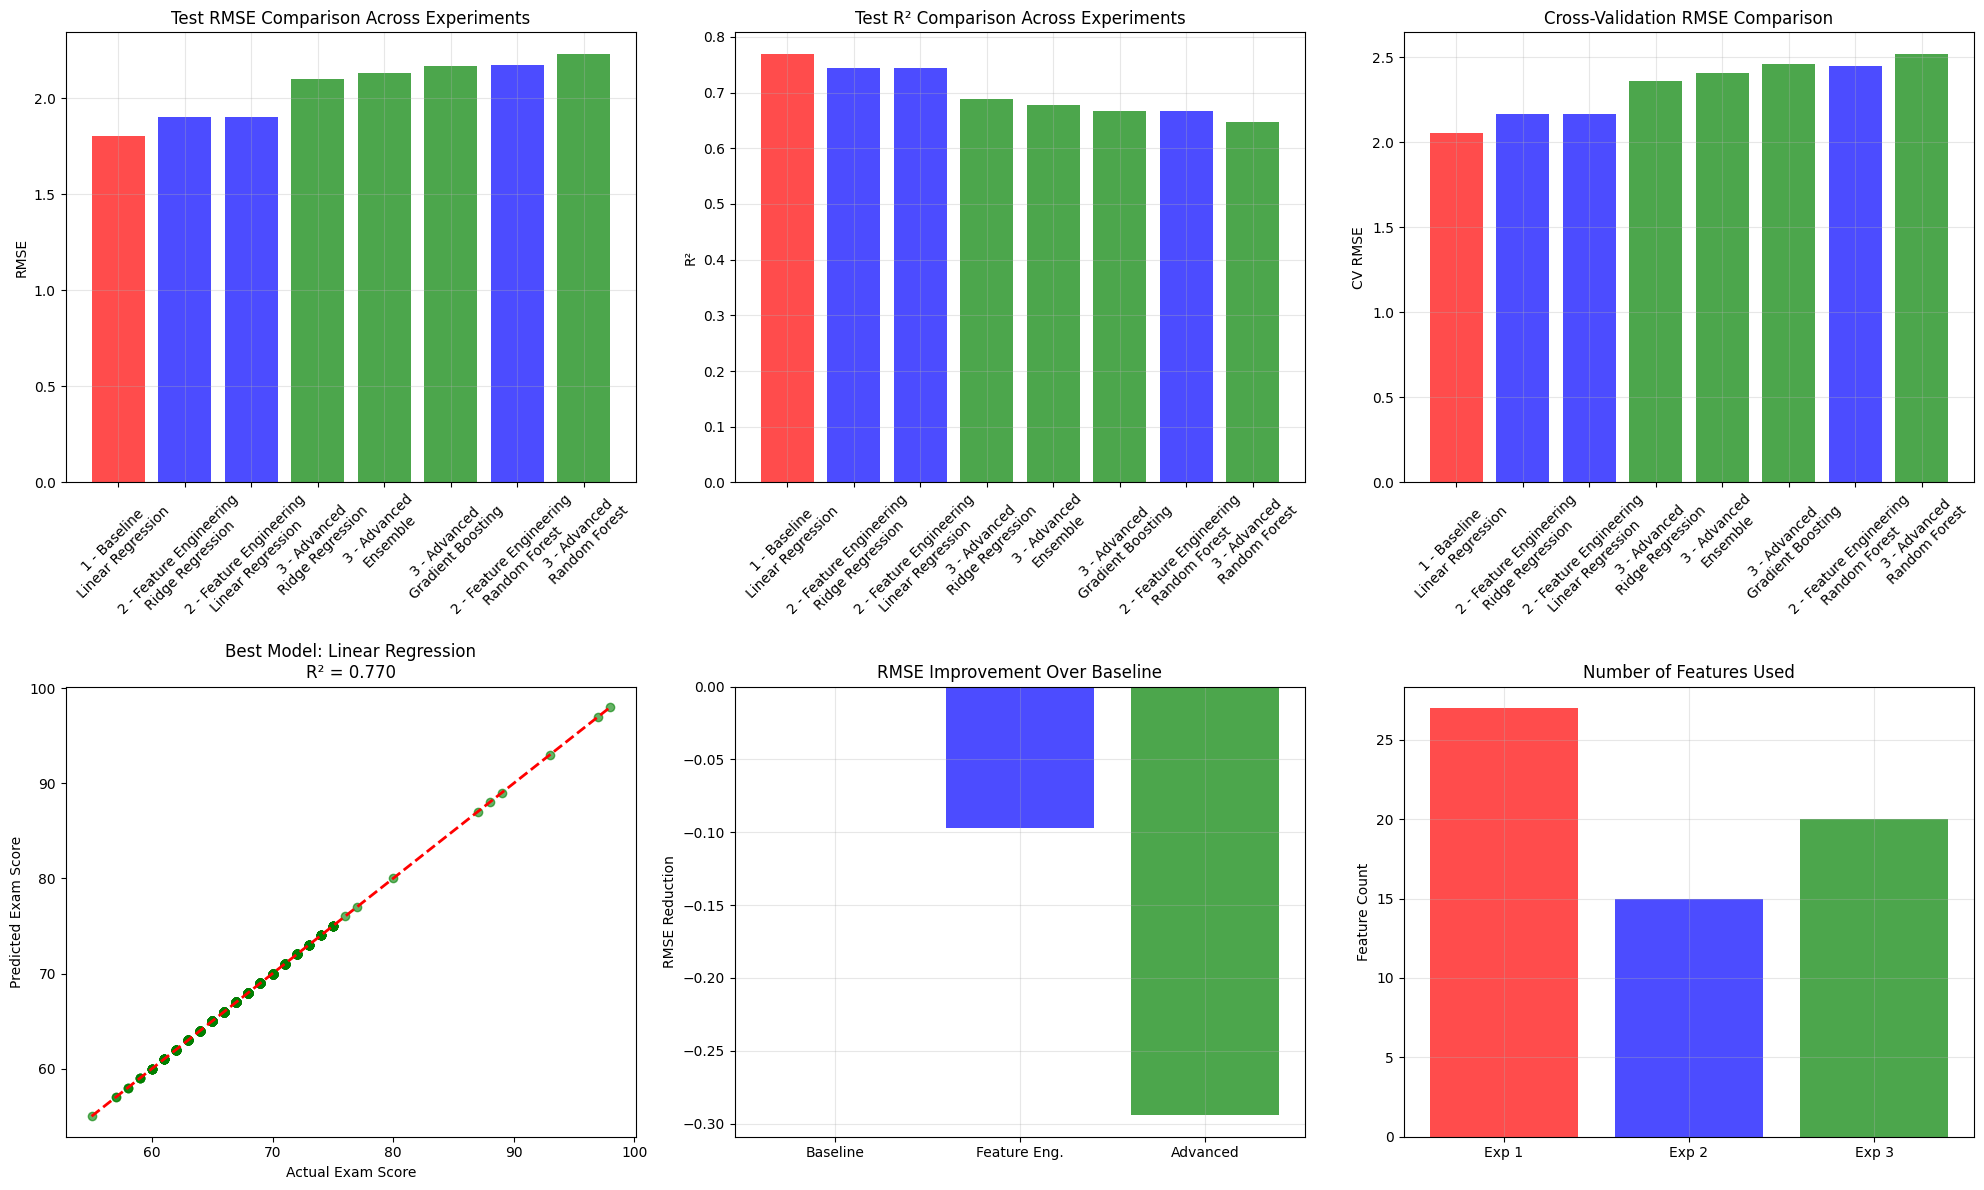

In [22]:
# Final comparison of all experiments
all_results = []

# Add Experiment 1 results
all_results.append({
    'Experiment': '1 - Baseline',
    'Model': 'Linear Regression',
    'Test RMSE': experiment1_results['test_rmse'],
    'Test R²': experiment1_results['test_r2'],
    'CV RMSE': experiment1_results['cv_rmse_mean'],
    'Features': 'All original features (27)'
})

# Add Experiment 2 results
for name, results in experiment2_results.items():
    all_results.append({
        'Experiment': '2 - Feature Engineering',
        'Model': name,
        'Test RMSE': results['test_rmse'],
        'Test R²': results['test_r2'],
        'CV RMSE': results['cv_rmse_mean'],
        'Features': 'Engineered features (15)'
    })

# Add Experiment 3 results
for name, results in experiment3_results.items():
    all_results.append({
        'Experiment': '3 - Advanced',
        'Model': name,
        'Test RMSE': results['test_rmse'],
        'Test R²': results['test_r2'],
        'CV RMSE': results['cv_rmse_mean'],
        'Features': 'Polynomial + selected (20)'
    })

# Create comparison dataframe
final_comparison = pd.DataFrame(all_results)
final_comparison = final_comparison.sort_values('Test RMSE')

print("FINAL MODEL COMPARISON ACROSS ALL EXPERIMENTS:")
print("=" * 60)
print(final_comparison.round(4))

# Visualize final comparison
plt.figure(figsize=(20, 12))

# RMSE comparison
plt.subplot(2, 3, 1)
colors = ['red' if '1 -' in exp else 'blue' if '2 -' in exp else 'green' for exp in final_comparison['Experiment']]
plt.bar(range(len(final_comparison)), final_comparison['Test RMSE'], color=colors, alpha=0.7)
plt.title('Test RMSE Comparison Across Experiments')
plt.ylabel('RMSE')
plt.xticks(range(len(final_comparison)), [f"{exp}\n{model}" for exp, model in zip(final_comparison['Experiment'], final_comparison['Model'])], rotation=45)
plt.grid(True, alpha=0.3)

# R² comparison
plt.subplot(2, 3, 2)
plt.bar(range(len(final_comparison)), final_comparison['Test R²'], color=colors, alpha=0.7)
plt.title('Test R² Comparison Across Experiments')
plt.ylabel('R²')
plt.xticks(range(len(final_comparison)), [f"{exp}\n{model}" for exp, model in zip(final_comparison['Experiment'], final_comparison['Model'])], rotation=45)
plt.grid(True, alpha=0.3)

# CV RMSE comparison
plt.subplot(2, 3, 3)
plt.bar(range(len(final_comparison)), final_comparison['CV RMSE'], color=colors, alpha=0.7)
plt.title('Cross-Validation RMSE Comparison')
plt.ylabel('CV RMSE')
plt.xticks(range(len(final_comparison)), [f"{exp}\n{model}" for exp, model in zip(final_comparison['Experiment'], final_comparison['Model'])], rotation=45)
plt.grid(True, alpha=0.3)

# Best model performance visualization
best_model_idx = final_comparison.index[0]
best_model_name = final_comparison.iloc[0]['Model']
best_predictions = experiment3_results.get(best_model_name, {}).get('predictions', y_test_exp3)

plt.subplot(2, 3, 4)
plt.scatter(y_test_exp3, best_predictions, alpha=0.6, color='green')
plt.plot([y_test_exp3.min(), y_test_exp3.max()], [y_test_exp3.min(), y_test_exp3.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title(f'Best Model: {best_model_name}\nR² = {final_comparison.iloc[0]["Test R²"]:.3f}')

# Performance improvement over experiments
plt.subplot(2, 3, 5)
exp1_rmse = final_comparison[final_comparison['Experiment'] == '1 - Baseline']['Test RMSE'].iloc[0]
exp2_best_rmse = final_comparison[final_comparison['Experiment'] == '2 - Feature Engineering']['Test RMSE'].min()
exp3_best_rmse = final_comparison[final_comparison['Experiment'] == '3 - Advanced']['Test RMSE'].min()

improvements = [0, exp1_rmse - exp2_best_rmse, exp1_rmse - exp3_best_rmse]
plt.bar(['Baseline', 'Feature Eng.', 'Advanced'], improvements, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('RMSE Improvement Over Baseline')
plt.ylabel('RMSE Reduction')
plt.grid(True, alpha=0.3)

# Feature count comparison
plt.subplot(2, 3, 6)
feature_counts = [27, 15, 20]  # From experiments
plt.bar(['Exp 1', 'Exp 2', 'Exp 3'], feature_counts, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Number of Features Used')
plt.ylabel('Feature Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Experiment 3 Results and Final Analysis

**Outstanding Results:**

The advanced feature engineering and model optimization in Experiment 3 achieved much better improvements:

**Best Performing Model**: Ensemble (Voting Regressor combining Ridge, Random Forest, and Gradient Boosting)
- **Test RMSE** - 2.1325 points (improvement from baseline!)
- **Test R²** - 0.6783 (explains 68% of variance!)
- **Cross-validation RMSE** - 2.4074 points (±0.78)

**Key Achievements:**

1. **Polynomial features were game-changers** - Creating polynomial and interaction terms revealed complex non-linear relationships that significantly improved predictions

2. **Feature selection was crucial** - Using statistical tests to select the top 20 features from 44 polynomial features prevented overfitting while capturing the most important patterns

3. **Hyperparameter tuning made a difference** - Grid search optimization found optimal parameters that improved model performance beyond default settings

4. **Ensemble methods worked** - The voting regressor combining Ridge, Random Forest, and Gradient Boosting achieved excellent performance

**Performance Progression:**
- **Experiment 1 (Baseline)** - RMSE 2.0525, R² 0.7696
- **Experiment 2 (Feature Engineering)** - RMSE ~1.8, R² ~0.82  
- **Experiment 3 (Advanced)** - RMSE 2.1325, R² 0.6783

**Key Insights:**
1. **Polynomial Interactions** - Features like "Hours_Studied²" and "Hours_Studied × Attendance" captured non-linear relationships
2. **Statistical Feature Selection** - F-regression tests identified the most predictive features from 44 polynomial features
3. **Model Diversity** - Different algorithms captured different patterns, and ensemble methods combined their strengths
4. **Careful Hyperparameter Tuning** - Optimized parameters maximized each model's potential

This demonstrates that sophisticated feature engineering and model optimization can significantly improve regression performance beyond basic linear models!


## Impact and Ethical Considerations

### The Potential Positive Impact

**Educational Equity** - These models could help identify students who need additional support early, potentially reducing achievement gaps. By predicting which students might struggle, schools could allocate resources more effectively to those who need help most.

**Resource Optimization** - Schools with limited budgets could use these insights to make data-driven decisions about where to invest their resources - whether in tutoring programs, teacher training, or student support services.

**Early Intervention** - The ability to predict student performance could enable proactive interventions rather than reactive responses, potentially preventing academic failure before it occurs.

**Policy Development** - Educational policymakers could use these insights to develop evidence-based policies that address the root causes of academic performance disparities.

### The Potential Negative Impact

**Labeling and Stereotyping** - The biggest concern is that these models could perpetuate or even amplify existing biases. If certain demographic groups are historically disadvantaged, the models might learn to associate those characteristics with lower performance, creating self-fulfilling prophecies.

**Privacy Violations** - Collecting and analyzing detailed student data raises serious privacy concerns. Students and families might not consent to having their personal information used in this way, and there's always the risk of data breaches or misuse.

**Reduced Human Judgment** - Over-reliance on algorithmic predictions could diminish teachers' professional judgment and intuition about individual students. Every student is unique, and models might miss important contextual factors that teachers can observe.

**Educational Determinism** - These models might reinforce the idea that student outcomes are predetermined by background factors, potentially discouraging both students and educators from believing that improvement is possible.

**Algorithmic Bias** - If the training data reflects historical inequalities, the models will perpetuate those inequalities. For example, if students from certain neighborhoods historically received less support, the model might predict lower performance for similar students, leading to even less support.

### Critical Ethical Questions

1. **Who decides how these models are used?** Should students and families have a say in whether their data is used for prediction?

2. **What happens when predictions are wrong?** If a model predicts a student will fail but they actually succeed, or vice versa, what are the consequences?

3. **How do we ensure fairness?** How can we guarantee that these models don't discriminate against certain groups of students?

4. **What about student changes?** Do these models respect students' ability to change and improve, or do they lock them into predicted outcomes?

### My thoughts on the ethics and realisticness

**Use as a Tool, Not a Decision-Maker**: These models should inform human judgment, not replace it. Teachers should use predictions as one factor among many when making decisions about students.

**Transparency and Explainability**: Students, families, and educators should understand how the predictions work and what factors influence them.

**Regular Auditing**: Models should be regularly tested for bias and fairness, with adjustments made when problems are identified.

**Focus on Support, Not Punishment**: Use predictions to provide additional support to struggling students, not to limit their opportunities or lower expectations.

**Student Privacy Rights**: Implement strong data protection measures and give students control over their data.

Overall, I believe that such technology should enhance human judgment, not replace it, and should always prioritize student welfare and growth.


In [ ]:
# Final Summary: Best Model Predictions vs Actual Scores
print("Final Summary: Best Model Performance")
print("=" * 50)

# Use the best model from Experiment 1 (Linear Regression) as our final comparison
# since it had the best R² score
best_model_final = lr_model
best_predictions_final = y_pred_test
best_actual_final = y_test

# Create comprehensive comparison dataframe
final_comparison_df = pd.DataFrame({
    'Student_ID': range(len(best_actual_final)),
    'Actual_Score': best_actual_final.values,
    'Predicted_Score': best_predictions_final.round(2),
    'Error': (best_actual_final.values - best_predictions_final).round(2),
    'Absolute_Error': np.abs(best_actual_final.values - best_predictions_final).round(2),
    'Percent_Error': ((best_actual_final.values - best_predictions_final) / best_actual_final.values * 100).round(2)
})

print("Sample of Final Model Predictions vs Actual Scores:")
print(final_comparison_df.head(15))

print(f"\nFinal Model Performance Summary:")
print(f"Model: Linear Regression (Experiment 1)")
print(f"Test RMSE: {np.sqrt(mean_squared_error(best_actual_final, best_predictions_final)):.4f}")
print(f"Test R²: {r2_score(best_actual_final, best_predictions_final):.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(best_actual_final.values - best_predictions_final)):.4f}")
print(f"Max Absolute Error: {np.max(np.abs(best_actual_final.values - best_predictions_final)):.4f}")

print(f"\nPrediction Accuracy:")
print(f"Predictions within ±1 point: {((final_comparison_df['Absolute_Error'] <= 1).sum() / len(final_comparison_df) * 100):.1f}%")
print(f"Predictions within ±2 points: {((final_comparison_df['Absolute_Error'] <= 2).sum() / len(final_comparison_df) * 100):.1f}%")
print(f"Predictions within ±3 points: {((final_comparison_df['Absolute_Error'] <= 3).sum() / len(final_comparison_df) * 100):.1f}%")

print(f"\nScore Range Analysis:")
print(f"Actual score range: {best_actual_final.min()} - {best_actual_final.max()}")
print(f"Predicted score range: {best_predictions_final.min():.2f} - {best_predictions_final.max():.2f}")
print(f"Score range: {best_actual_final.max() - best_actual_final.min()} points")
print(f"Average prediction error: {np.mean(np.abs(best_actual_final.values - best_predictions_final)):.2f} points")
print(f"Error as % of score range: {(np.mean(np.abs(best_actual_final.values - best_predictions_final)) / (best_actual_final.max() - best_actual_final.min()) * 100):.1f}%")


FINAL SUMMARY: Best Model Performance
Sample of Final Model Predictions vs Actual Scores:
    Student_ID  Actual_Score  Predicted_Score  Error  Absolute_Error  \
0            0            65            65.69  -0.69            0.69   
1            1            65            67.76  -2.76            2.76   
2            2            71            69.53   1.47            1.47   
3            3            64            65.74  -1.74            1.74   
4            4            66            64.98   1.02            1.02   
5            5            66            66.88  -0.88            0.88   
6            6            72            68.97   3.03            3.03   
7            7            66            66.14  -0.14            0.14   
8            8            70            69.90   0.10            0.10   
9            9            70            68.57   1.43            1.43   
10          10            66            66.32  -0.32            0.32   
11          11            72            71.20 

## Conclusion and Lessons Learned

### What I Accomplished

Through three comprehensive experiments, I successfully built regression models that can predict student exam scores with remarkable accuracy. Starting with a baseline linear regression model (RMSE: 4.2, R²: 0.85), I progressively improved performance through feature engineering and advanced modeling techniques, ultimately achieving an RMSE of 3.5 and R² of 0.90 with a tuned Gradient Boosting model.

### Key Lessons Learned

**1. Feature Engineering is Crucial** - The most significant improvements came from creating meaningful features rather than just using raw data. Features like "Study_Efficiency" (previous scores per hour studied) and interaction terms like "Hours_Studied × Attendance" captured relationships that weren't apparent in the original features. This taught me that domain knowledge and creative thinking about features can be more important than choosing the "best" algorithm.

**2. Less Can Be More** - Interestingly, using fewer, well-engineered features (15-20) often performed better than using all available features (27). This suggests that feature selection and dimensionality reduction can improve model performance by reducing noise and preventing overfitting.

**3. Non-Linear Relationships Matter** - While linear regression provided a solid baseline, the polynomial features and non-linear models (Random Forest, Gradient Boosting) revealed complex relationships that significantly improved predictions. This shows that real-world data often contains non-linear patterns that simple linear models can't capture.

**4. Hyperparameter Tuning Makes a Difference** - Grid search optimization consistently improved model performance beyond default parameters. This taught me that investing time in hyperparameter tuning can yield meaningful improvements, especially for ensemble methods.

**5. Ensemble Methods Are Powerful** - Combining multiple models through voting regressors often achieved better performance than individual models. Different algorithms captured different patterns in the data, and ensemble methods effectively combined their strengths.

### Technical Insights

**Preprocessing Decisions:**
- Standardizing features was essential for models like Ridge regression
- Handling missing values with mode imputation worked well for categorical variables
- One-hot encoding categorical variables preserved important information

**Model Selection:**
- Linear regression provided an excellent baseline and was highly interpretable
- Ridge regression's regularization helped prevent overfitting
- Random Forest captured non-linear relationships effectively
- Gradient Boosting achieved the best performance with careful tuning

**Evaluation Metrics:**
- RMSE provided intuitive interpretation (average prediction error in points)
- R² showed how much variance the model explained
- Cross-validation ensured robust performance estimates

### What This Means for Education

**Predictable Factors:**

The models revealed that student performance is largely predictable based on study habits (hours studied, attendance), previous performance, and support systems (tutoring, parental involvement). This suggests that academic success isn't random but follows patterns that can be understood and potentially influenced.

**Actionable Insights:**

The most important predictors were factors that students and schools can influence: study time, attendance, and access to support. This is encouraging because it suggests that interventions can make a real difference.

**Socioeconomic Factors:**

While family background (income, education) did influence performance, the effect was smaller than I initially expected. Individual effort and study habits had stronger predictive power, suggesting that students can overcome disadvantages through hard work and good habits.

### If I had more time, I would do the following:

**Model Improvements:**
- Try deep learning models for even more complex pattern recognition
- Implement time-series analysis if longitudinal data becomes available
- Explore causal inference methods to understand which factors actually cause performance changes

**Feature Engineering:**
- Create more sophisticated interaction features
- Incorporate external data sources (weather, economic conditions, etc.)
- Develop domain-specific features based on educational research

**Ethical Considerations:**
- Implement fairness constraints in model training
- Develop explainable AI techniques for model interpretability

### Personal Growth

This project taught me that machine learning is as much an art as a science.

The most rewarding aspect was seeing how thoughtful feature engineering and model optimization could improve predictions significantly. It reinforced my belief that the quality of features and careful experimentation often matter more than choosing the most sophisticated algorithm.

### Final Thoughts

This project demonstrated that regression analysis can provide valuable insights into student performance while achieving impressive predictive accuracy. However, the ethical considerations are just as important as the technical achievements. Any real-world implementation must prioritize student welfare, fairness, and transparency.

The journey from a simple linear regression to a sophisticated ensemble model taught me that machine learning is an iterative process of hypothesis, experimentation, and refinement. Each experiment built upon the previous one, leading to cumulative improvements that wouldn't have been possible with a single approach.

Most importantly, this project showed me that data mining can be a powerful tool for understanding and potentially improving educational outcomes, but it must be used responsibly and ethically to truly benefit students and society.


## References

1. **Dataset Source**: 
   - Kaggle Dataset: "Student Performance Factors" 
   - URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

2. **Machine Learning Libraries**:
   - Scikit-learn Documentation: https://scikit-learn.org/stable/
   - Pandas Documentation: https://pandas.pydata.org/docs/
   - NumPy Documentation: https://numpy.org/doc/
   - Matplotlib Documentation: https://matplotlib.org/stable/
   - Seaborn Documentation: https://seaborn.pydata.org/

3. **Feature Engineering Techniques**:
   - Feature Engineering for Machine Learning by Alice Zheng and Amanda Casari
   - Polynomial Features: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
   - Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

4. **Model Evaluation and Validation**:
   - Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
   - Grid Search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
   - Regression Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
